## Blood Donor Dataset Analysis:

##### Blood donation is a critical component of modern healthcare systems, serving as a lifeline for countless patients requiring transfusions, surgeries, and emergency medical interventions. Understanding donor behavior, identifying patterns in donation frequency, and analyzing the factors that influence donor retention are essential for blood banks and healthcare organizations to maintain adequate blood supplies and optimize their outreach strategies.

##### 
This exploratory data analysis (EDA) project delves deep into blood donor datasets to uncover meaningful insights that can drive evidence-based decision-making in blood bank management. By examining donor demographics, donation histories, and behavioral patterns, we aim to transform raw data into actionable intelligence that can enhance donor recruitment, improve retention rates, and ultimately save more lives.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# ignore harmless warnings
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# data import
data = pd.read_csv('blood_donor_dataset.csv')
# data shape
print(f'the data has {data.shape[0]} rows and {data.shape[1]} columns.')

the data has 10000 rows and 12 columns.


In [3]:
data.head()

,donor_id,name,email,password,contact_number,city,blood_group,availability,months_since_first_donation,number_of_donation,pints_donated,created_at
0,1b8b4c828a,Norma Fisher,ysullivan@yahoo.com,P5hX6Syg*A,+61 461706749,Hobart,A+,No,65,31,62,2017-03-17
1,a6a3f7fe55,Eugene Bowman,hramos@brown-sellers.com,b6Wq6Cqz@5,+61 450709944,Darwin,AB-,Yes,64,8,16,2016-11-11
2,cee6478144,Sheri Bolton DDS,jasmine85@hotmail.com,$9RB51m#s7,+61 428756361,Melbourne,AB+,Yes,39,6,6,2022-02-25
3,5986bc55f9,Kelly Boyd,pattylawrence@riley-hayes.com,@5Tdg(4kCm,+61 454318320,Darwin,A-,No,55,20,20,2025-04-04
4,93246afe6c,Taylor Guzman,martinezjacob@wilson.com,x!)9Ag@J*7,+61 484158472,Darwin,O-,No,7,35,35,2022-11-30


In [6]:
data.describe()

,months_since_first_donation,number_of_donation,pints_donated
count,10000.000000,10000.000000,10000.000000
mean,59.953100,25.128200,37.614000
std,34.911379,14.654195,26.334072
min,0.000000,0.000000,0.000000
25%,30.000000,12.000000,16.000000
50%,60.000000,26.000000,34.000000
75%,90.000000,38.000000,50.000000
max,120.000000,50.000000,100.000000


## Check missing values 

In [31]:
# Checking the data type and missing values with sample

# Dataframe for datatype
data_type = pd.DataFrame(data.dtypes, columns = ['Data_type'])

# Dataframe for missing percent
data_missing = pd.DataFrame(np.round(data.isnull().mean()*100,2),
                            columns = ['Missing_percent'])

# Dataframe for sampledata
sample_data = pd.DataFrame(data.head(2).T)

# Renaming the dataframe columns
sample_data.rename(columns = {0: 'Sample1',
                              1: 'Sample2'}, inplace = True)

# Concatinating the above dataframe
data_concat = pd.concat([data_missing, data_type, sample_data], axis=1)

data_concat

,Missing_percent,Data_type,Sample1,Sample2
city,0.0,object,Hobart,Darwin
blood_group,0.0,object,A+,AB-
availability,0.0,object,No,Yes
months_since_first_donation,0.0,int64,65,64
number_of_donation,0.0,int64,31,8
pints_donated,0.0,int64,62,16
created_at,0.0,object,2017-03-17,2016-11-11


In [32]:
# undestanding the categorical columns
for attribute in data.columns:
    if data[attribute].dtype == 'O':
        if data[attribute].nunique() == 1:
            print(f'**{attribute} has 1 unique value.**')
        else:
            print(f'{attribute} has {data[attribute].nunique()}unique values.')


city has 8unique values.
blood_group has 8unique values.
availability has 2unique values.
created_at has 3409unique values.


In [ ]:
# To check donor are duplicated or not
data["donor_id"].duplicated().sum()

In [57]:
# removing the attribute 'contact_number','password','email','name' as this is a personal information it wont contribute to the analysis

exclude_cols = ['donor_id', 'created_at', 'contact_number', 'password', 'email', 'name']

In [49]:
for attribute in data.columns:
    if data[attribute].dtype != 'O':
        if data[attribute].nunique() == 1:
            print(f'**{attribute} has 1 unique value.**')
        else:
            print(f'{attribute} has {data[attribute].nunique()}unique values.')

months_since_first_donation has 121unique values.
number_of_donation has 51unique values.
pints_donated has 76unique values.


#### There is no missing value and duplicate

In [50]:
data['availability'].value_counts()

availability
Yes    5085
No     4915
Name: count, dtype: int64

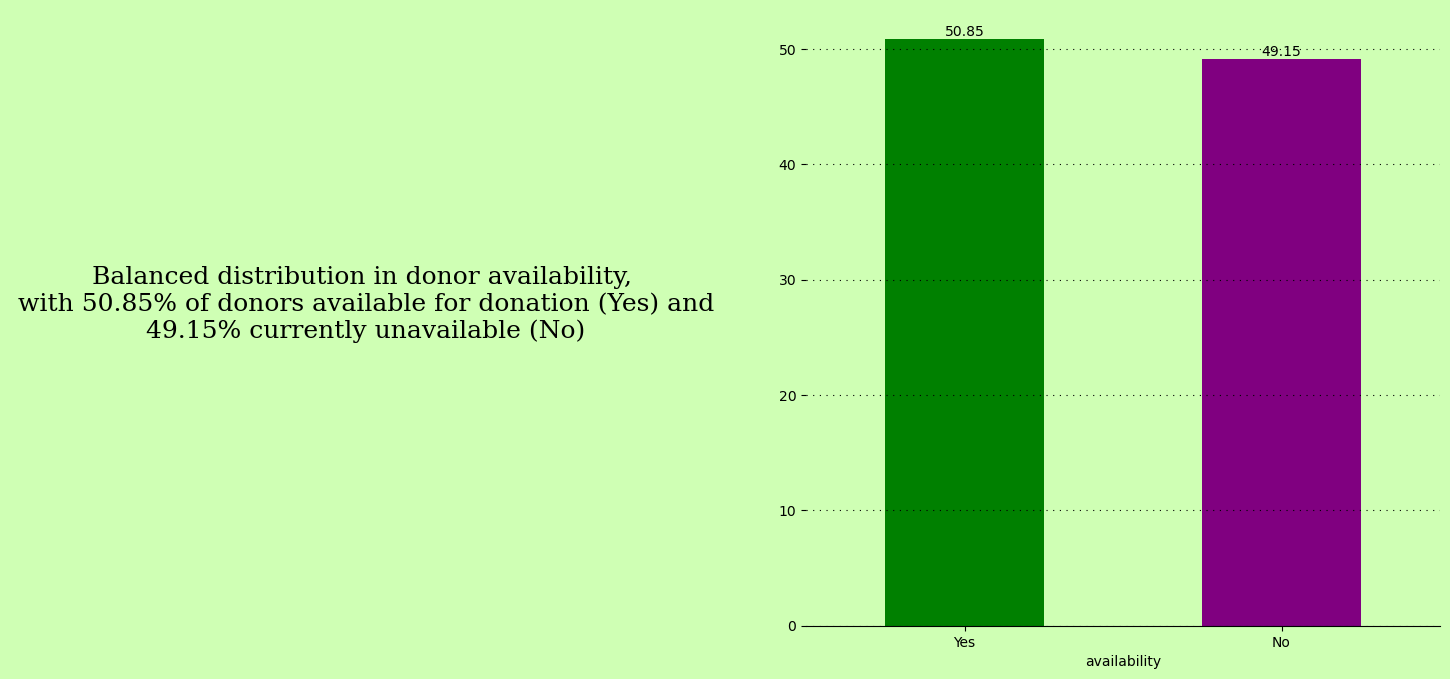

In [51]:
fig = plt.figure(figsize = (18,8))
spec = fig.add_gridspec(1,2) 
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])
fig.set_facecolor('#cfffb4')
for area in [fig,sec_1,sec_2]:
    area.set_facecolor('#cfffb4')
# ploting the graph
ax = round(data['availability'].value_counts(normalize = True)*100,2).plot.bar(color =[ 'green','purple'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 0)
sec_2.grid(axis = 'y',color = 'black',ls = ':' ,dashes = (1,5))
sec_1.text(0.5,0.5,'Balanced distribution in donor availability,\n with 50.85% of donors available for donation (Yes) and\n 49.15% currently unavailable (No)\n' ,ha = 'center',va = 'center', size = 18,fontfamily = 'serif')
sec_1.xaxis.set_visible(False)
sec_1.yaxis.set_visible(False)
for position in ['top', 'right','bottom','left']:
    sec_1.spines[position].set_visible(False)
for section in [sec_1, sec_2]:
    for position in ['top', 'right', 'bottom', 'left']:
        if section == sec_2 and position == 'bottom':
            continue
        else:
            section.spines[position].set_visible(False)
plt.show()

##### With just over 50% donor availability, blood banks can reliably predict that
##### approximately half of their registered donor database will be accessible 
##### for emergency campaigns or routine collection drives

# Data Exploration

### donor_id, name, email, password, contact_number are unique values and it contain personal information

# Explore categorical features

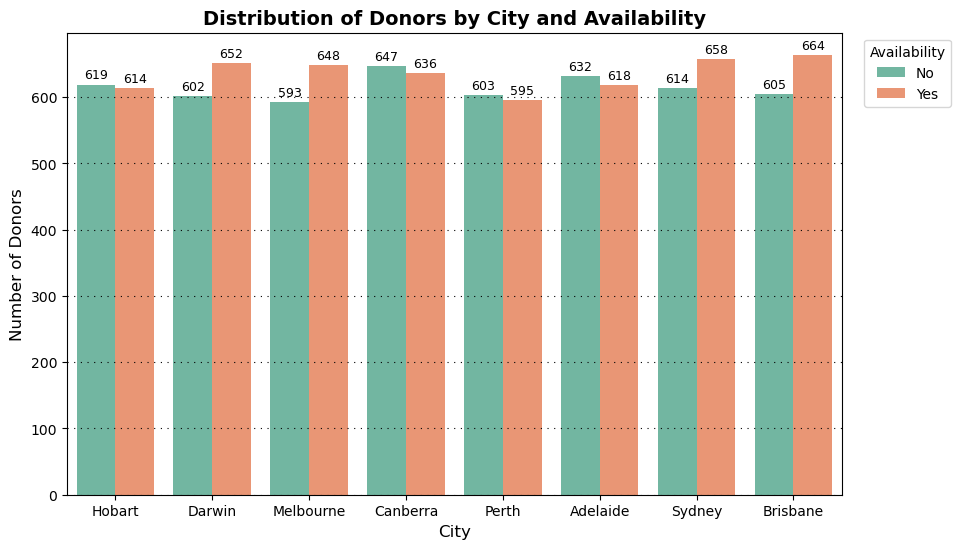

In [52]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='city', data=data,hue='availability',palette = 'Set2')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=2)
ax.grid(axis = 'y',color = 'black',ls = ':' ,dashes = (1,5))
plt.title("Distribution of Donors by City and Availability", fontsize=14, fontweight='bold')
plt.xlabel("City", fontsize=12)
plt.ylabel("Number of Donors", fontsize=12)
plt.legend(title="Availability", loc="upper right", bbox_to_anchor=(1.15,1))
plt.show()

##### Brisbane shows the highest number of available donors (664)
##### Perth has the lowest number of available donors (595)
##### Darwin demonstrates the most balanced split between available and unavailable donors

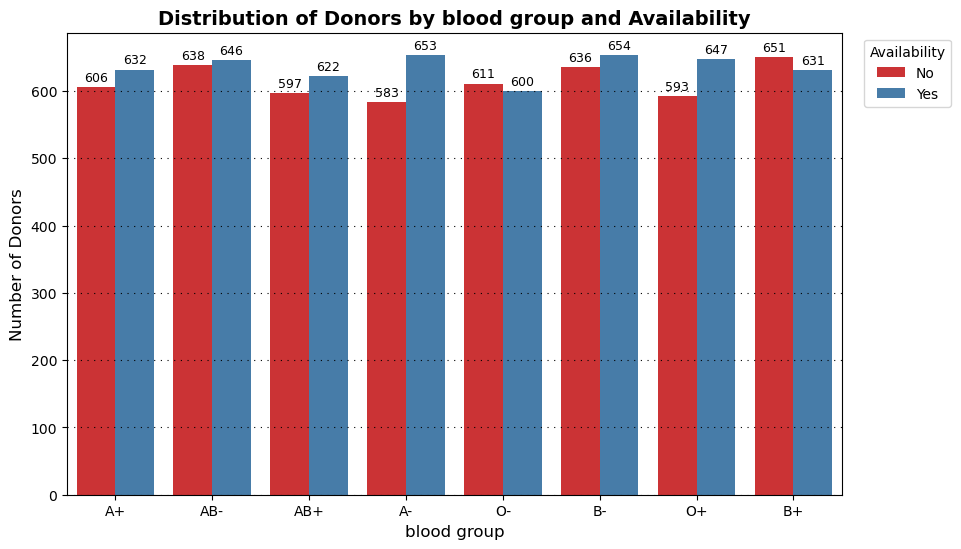

In [53]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='blood_group', data=data,hue='availability', palette = 'Set1')
for container in ax.containers:
    ax.bar_label(container, fmt = '%d', label_type = 'edge', fontsize = 9, padding = 2)
ax.grid(axis = 'y',color = 'black' ,ls = ':' , dashes = (1,5))
plt.title("Distribution of Donors by blood group and Availability", fontsize=14, fontweight='bold')
plt.xlabel("blood group", fontsize=12)
plt.ylabel("Number of Donors", fontsize=12)
plt.legend(title="Availability", loc="upper right", bbox_to_anchor=(1.15,1))
plt.show()

### 1. Balanced Blood Group Distribution
##### All blood groups show remarkably consistent donor counts (~1,200-1,300 total donors each)
##### AB- has highest total (1,284 donors)
##### A- has lowest total (1,236 donors)
##### Difference of only ~48 donors between highest and lowest groups

#### 3. Notable Blood Group Variations 
A- donors: Lowest availability (583 available vs 653 unavailable) 
AB+ donors: Highest availability (622 available vs 597 unavailable )
Universal donor O-: Moderate availability (600 available vs 611 unavailal e)
Universal recipient AB+: Best availability ratio

In [54]:
# creating a dataset where the value of A- :
data_filtered = data[data['blood_group'] == 'A-']
data_filtered.shape

(1236, 7)

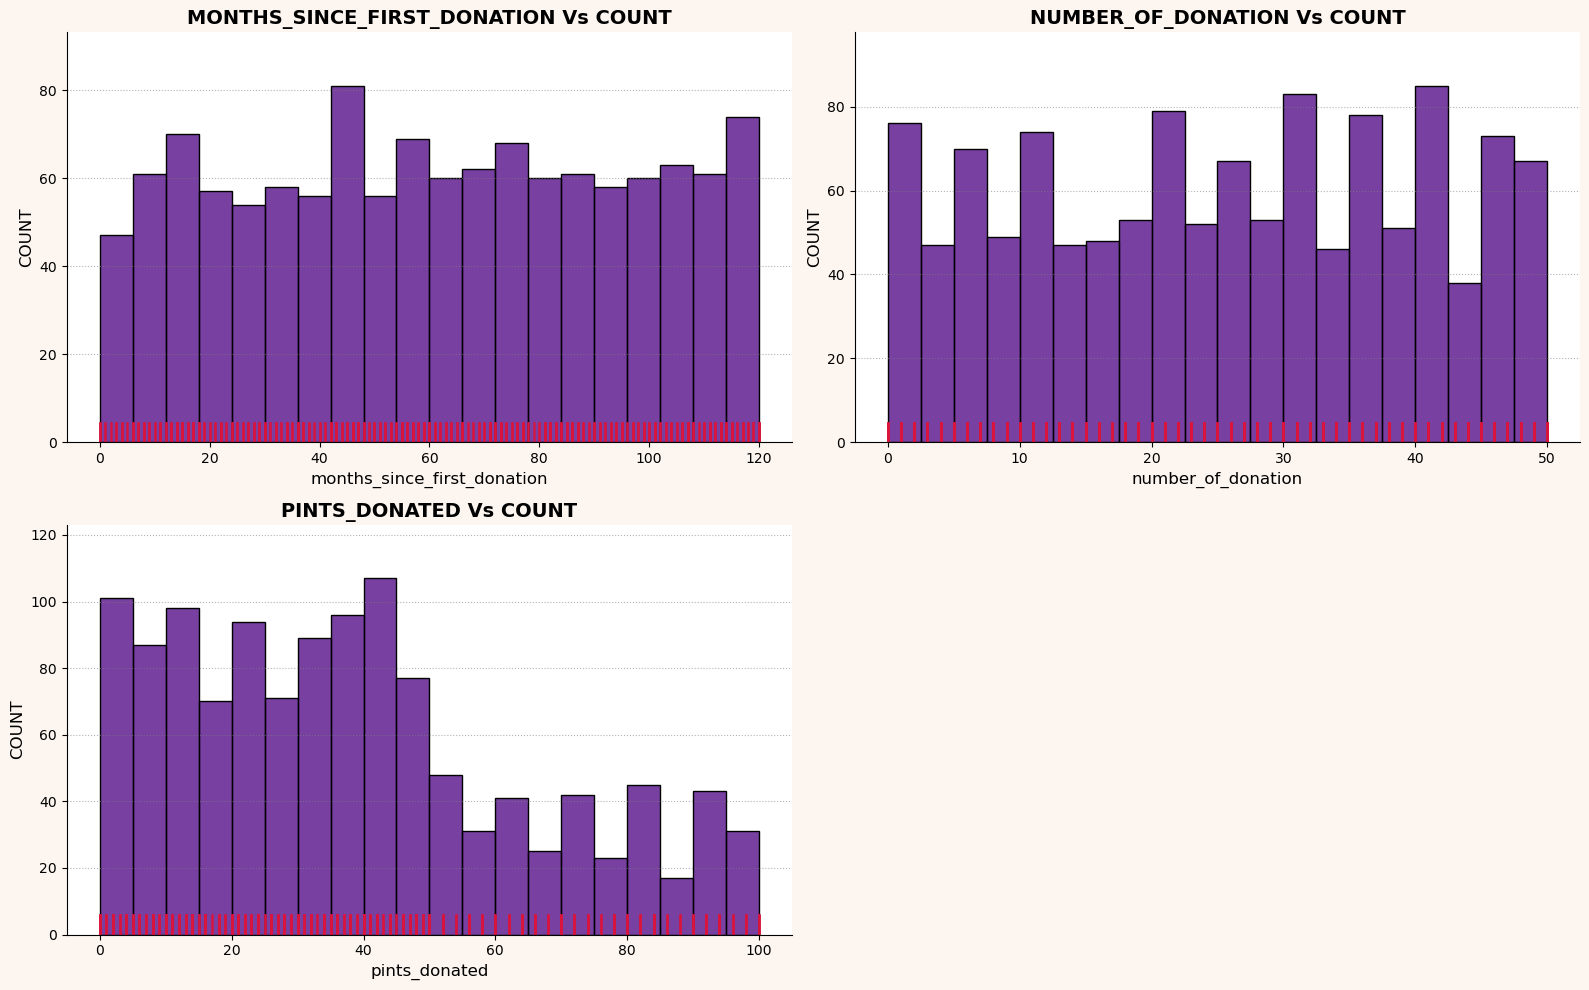

In [55]:
import math
# Select numeric features only
numeric_features = [col for col in data_filtered.columns 
                    if data_filtered[col].dtype != 'O' and data_filtered[col].nunique() > 5]

# Dynamically calculate subplot grid size
n_features = len(numeric_features)
ncols = 2
nrows = math.ceil(n_features / ncols)

# Create figure
fig, axes = plt.subplots(nrows, ncols, figsize=(16, 5*nrows))
axes = axes.flatten()  # Flatten into 1D for easy indexing

# Background color (lighter pastel for readability)
bg_color = '#fdf6f0'
fig.patch.set_facecolor(bg_color)

# Loop through numeric features
for i, feature in enumerate(numeric_features):
    ax = axes[i]
    # Histogram
    sns.histplot(data=data_filtered, x=feature, bins=20, color='#4B0082', edgecolor="black", ax=ax)
    # Rugplot (ticks at bottom)
    sns.rugplot(data=data_filtered, x=feature, height=0.05, color='crimson', ax=ax)

    # Styling
    ax.set_ylabel("COUNT", fontsize=12)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_title(f"{feature.upper()} Vs COUNT", fontsize=14, weight='bold')
    ax.grid(color='grey', linestyle=':', axis='y', zorder=0, alpha=0.6)

    # Clean up spines
    for location in ['top', 'right']:
        ax.spines[location].set_visible(False)

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Correct layout
plt.tight_layout()
plt.show()


### The A- donor data shows that most donors contribute only a modest number of donations and pints, with a smaller group accounting for higher volumes. This highlights the importance of retaining frequent donors while motivating newer and less active donors to increase participation.

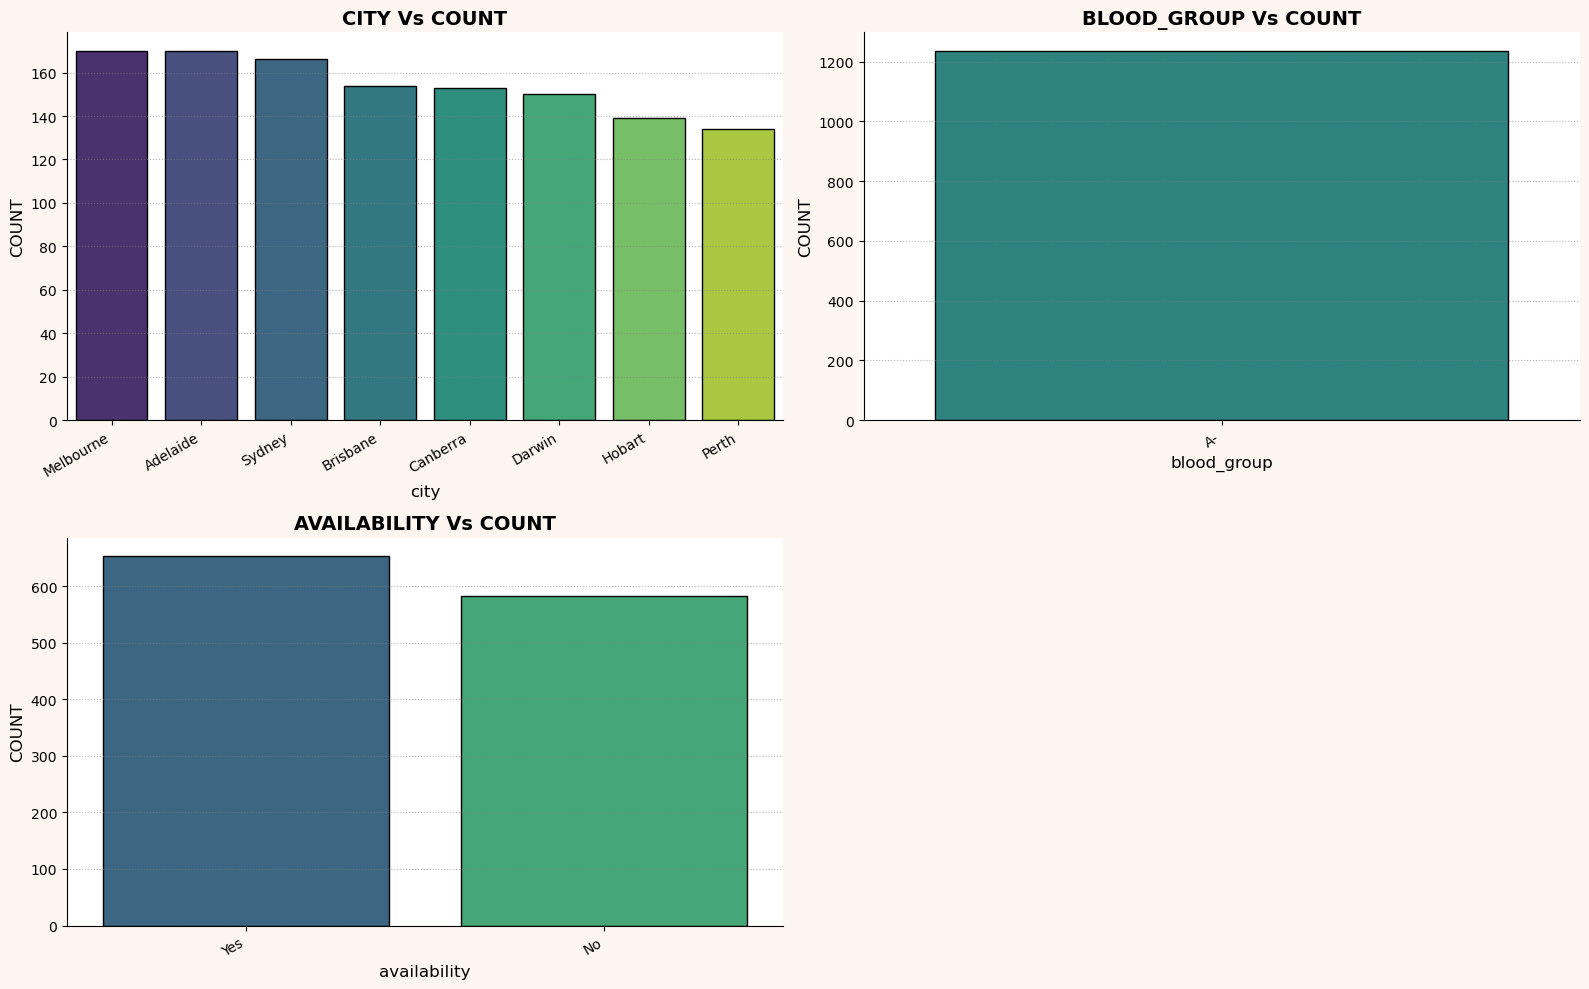

In [59]:
import math
# Drop ID-like and timestamp columns first
exclude_cols = ['donor_id', 'created_at', 'contact_number', 'password', 'email', 'name']

# Select categorical features only (excluding high-cardinality + unwanted)
categorical_features = [
    col for col in data_filtered.columns 
    if (data_filtered[col].dtype == 'O' or data_filtered[col].nunique() <= 20) 
    and col not in exclude_cols
]

# Dynamically calculate subplot grid size
n_features = len(categorical_features)
ncols = 2
nrows = math.ceil(n_features / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(16, 5*nrows))
axes = axes.flatten()
fig.patch.set_facecolor('#fdf6f0')

# Plot clean count plots
for i, feature in enumerate(categorical_features):
    ax = axes[i]
    order = data_filtered[feature].value_counts().index   # Sorted bars
    sns.countplot(data=data_filtered, x=feature, order=order, palette="viridis", ax=ax, edgecolor="black")
    
    ax.set_title(f"{feature.upper()} Vs COUNT", fontsize=14, weight='bold')
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel("COUNT", fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
    ax.grid(color='grey', linestyle=':', axis='y', alpha=0.6)
    for loc in ['top','right']:
        ax.spines[loc].set_visible(False)

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### The analysis of A- donors shows a fairly balanced distribution across major cities, with slightly higher representation in Melbourne, Adelaide, and Sydney. In terms of availability, there are more donors currently available than unavailable, though the margin is modest. Overall, while geographic representation is relatively consistent, the availability data emphasizes the importance of maintaining donor engagement to ensure a steady and reliable supply of A- blood.

## The A‑ blood donation system has potential, 
## but without improving donor availability and reducing fluctuations,
## it cannot guarantee a reliable supply. 
## Strong donor management is essential for long‑term sustainability.